In [7]:
import pathlib as p
from functions import *
import nibabel as nib
import numpy as np
import random

# interpolated
DATA_DIR = p.Path.home()/"data"/"bobsrepository"
axial = DATA_DIR/"LR_data"/"axial"/"even"
coronal = DATA_DIR/"LR_data"/"coronal"/"even"
sagittal = DATA_DIR/"LR_data"/"sagittal"/"even"
t1_files = sorted(DATA_DIR.rglob("*T1w.nii.gz"))
t2_files = sorted(DATA_DIR.rglob("*T2w.nii.gz"))


t2_LR_files = sorted(axial.rglob("*T2w_LR.nii.gz"))
t2_LR4_files = sorted(axial.rglob("*T2w_LR4.nii.gz"))
t2_LR3_files = sorted(axial.rglob("*T2w_LR3.nii.gz"))
t2_LR5_files = sorted(axial.rglob("*T2w_LR5.nii.gz"))
#t2_LR8_files = sorted(axial.rglob("*T2w_LR8.nii.gz"))

target_shape = (192, 224, 192) 
patch_size = (32, 32, 32)
stride = (16, 16, 16)

files = list(zip(t1_files, t2_files, t2_LR5_files))
train, val, test = split_dataset(files)
test_t1, test_t2, test_t2_LR, affine = get_patches(test, patch_size, stride, target_shape)
ref_img = nib.load(str(t1_files[0]))


/Users/al1612le/data/bobsrepository/sub-890518/ses-8mo/anat/sub-890518_ses-8mo_space-INFANTMNIacpc_T1w.nii.gz /Users/al1612le/data/bobsrepository/sub-890518/ses-8mo/anat/sub-890518_ses-8mo_space-INFANTMNIacpc_T2w.nii.gz /Users/al1612le/data/bobsrepository/LR_data/axial/even/LR5/sub-890518_ses-8mo_space-INFANTMNIacpc_T2w_LR5.nii.gz
/Users/al1612le/data/bobsrepository/sub-938316/ses-2mo/anat/sub-938316_ses-2mo_space-INFANTMNIacpc_T1w.nii.gz /Users/al1612le/data/bobsrepository/sub-938316/ses-2mo/anat/sub-938316_ses-2mo_space-INFANTMNIacpc_T2w.nii.gz /Users/al1612le/data/bobsrepository/LR_data/axial/even/LR5/sub-938316_ses-2mo_space-INFANTMNIacpc_T2w_LR5.nii.gz
/Users/al1612le/data/bobsrepository/sub-938316/ses-5mo/anat/sub-938316_ses-5mo_space-INFANTMNIacpc_T1w.nii.gz /Users/al1612le/data/bobsrepository/sub-938316/ses-5mo/anat/sub-938316_ses-5mo_space-INFANTMNIacpc_T2w.nii.gz /Users/al1612le/data/bobsrepository/LR_data/axial/even/LR5/sub-938316_ses-5mo_space-INFANTMNIacpc_T2w_LR5.nii.gz
/

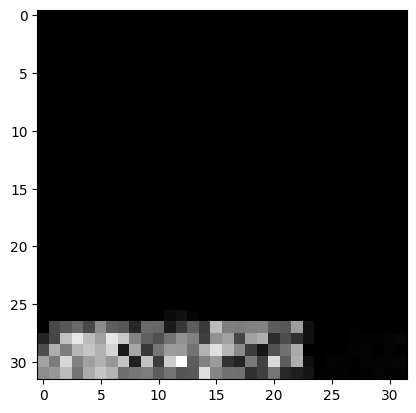

1573


In [33]:
#plot 10 test_t2_LR patches here
import matplotlib.pyplot as plt
mid_slice = patch_size[2]//2
plt.imshow(test_t2_LR[0][100][:,:,mid_slice], cmap='gray')
plt.show()

print(len(test_t2_LR[0]))

In [64]:
t2 = nib.load(t2_files[5])
tem_dir = p.Path.home()/"nihpd_obj2_asym_nifti"
template_files = sorted(tem_dir.rglob("*t2w.nii"))
print(len(template_files))
for i in range(len(template_files)):
    print(nib.load(template_files[i]).affine)


11
[[   1.    0.    0.  -96.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
[[   1.    0.    0.  -96.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
[[   1.    0.    0.  -96.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
[[   1.    0.    0.  -96.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
[[   1.    0.    0.  -96.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
[[   1.    0.    0.  -96.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
[[   1.    0.    0.  -96.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
[[   1.    0.    0.  -96.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
[[   1.    0.    0.  -96.]
 [   0.    1.    0. -134.]
 [   0.    0.    1.  -72.]
 [   0.    0.    0.    1.]]
[[   1.    0.   

In [ ]:

print(test[0][1])
real = nib.load(test[0][1])
real = pad_to_shape(real, target_shape)
real = normalize(real)
realaffine = real.affine
real_patches = extract_3D_patches(real.get_fdata(), patch_size, stride)
real = reconstruct_from_patches(real_patches, target_shape, stride)
#nib.save(nib.Nifti1Image(real, realaffine), "/Users/al1612le/images/real_image_padded_normalized.nii.gz")


In [92]:
#do the exact same as loop
real_images = []
test_t1, test_t2, test_t2_LR = get_patches(test, patch_size, stride, target_shape)
for i in range(len(test_t1)):
    real_reconstructed = reconstruct_from_patches(test_t2[i], target_shape, stride)
    real_images.append(real_reconstructed)

nib.save(nib.Nifti1Image(real_images[0], affine=realaffine), "/Users/al1612le/images/testarriktig.nii.gz")

In [59]:

target_shape = (192, 224, 192)
patch_size = (32, 32, 32)
stride = (16, 16, 16)

#ref_img = nib.load(str(t1_files[0]))


In [17]:
#train_t1, train_t2, train_t2_LR = get_patches(train4, patch_size, stride, target_shape, ref_img)
#val_t1, val_t2, val_t2_LR = get_patches(val4, patch_size, stride, target_shape, ref_img)
test_t1, test_t2, test_t2_LR = get_patches(test, patch_size, stride, target_shape)


In [93]:
all = []
for j in range(len(test_t1[0])):
    input = torch.tensor(test_t2_LR[0][j]).float().unsqueeze(0)
    all.append(input.squeeze(0).squeeze(0).cpu().numpy()) 
gen_reconstructed = reconstruct_from_patches(all, target_shape, stride)


In [147]:
#save output nifti
gen_nifti = nib.Nifti1Image(gen_reconstructed, affine=ref_img.affine)
nib.save(gen_nifti, "/Users/al1612le/images/tugba_deep_unet_with_LR4_LR2_training_6res_lpipsmse.nii.gz")

In [8]:
interpolated_images = []
for i in range(len(test_t1)):
        
        interpolated_reconstructed = reconstruct_from_patches(test_t2_LR[i], target_shape, stride)
        interpolated_images.append(interpolated_reconstructed)
        print(f"Processed test image {i+1}/{len(test_t1)}")



Processed test image 1/11
Processed test image 2/11
Processed test image 3/11
Processed test image 4/11
Processed test image 5/11
Processed test image 6/11
Processed test image 7/11
Processed test image 8/11
Processed test image 9/11
Processed test image 10/11
Processed test image 11/11


In [ ]:
#TEST AUGMENTED DATA

#load Unet weights
import torch
from monai.networks.nets import UNet
#from unet import UNet
from monai.networks.layers.factories import Norm
#from unet import UNet
DATA_DIR = p.Path.home()/"data"/"bobsrepository"

net = UNet(
    spatial_dims=3,
    in_channels=2,
    out_channels=1,
    channels=(16, 32, 64, 128, 256),
    strides=(2, 2, 2, 2),
    num_res_units=2,
    norm=None,
)
net.load_state_dict(torch.load(DATA_DIR/"outputs"/"2025-10-16T23:05:46.875504_model_weights.pth", map_location="cpu"))


generated_images = []
real_images = []
net.eval()
with torch.no_grad():
    for i in range(len(test_t1)):
        all_outputs = []
        for j in range(len(test_t1[0])):
            input1 = torch.tensor(test_t1[i][j]).float()
            input2 = torch.tensor(test_t2_LR[i][j]).float()
            inputs = torch.stack([input1, input2], dim=0).unsqueeze(0)  # (1, 2, 64, 64, 64)
            output = net(inputs)
            all_outputs.append(output.squeeze(0).squeeze(0).cpu().numpy())  # (64, 64, 64)
        
        gen_reconstructed = reconstruct_from_patches(all_outputs, target_shape, stride)
        real_reconstructed = reconstruct_from_patches(test_t2[i], target_shape, stride)
        generated_images.append(gen_reconstructed)
        real_images.append(real_reconstructed)
        print(f"Processed test image {i+1}/{len(test_t1)}")


/var/folders/j3/fb9w9g7s1vqdx2y5by7m63180000gp/T/ipykernel_3508/3099298288.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(DATA_DIR/"outp

Processed test image 1/11
Processed test image 2/11
Processed test image 3/11
Processed test image 4/11
Processed test image 5/11
Processed test image 6/11
Processed test image 7/11
Processed test image 8/11
Processed test image 9/11
Processed test image 10/11
Processed test image 11/11


In [ ]:
#Test single input

#load Unet weights
import torch
from monai.networks.nets import UNet
#from unet import UNet
from monai.networks.layers.factories import Norm
#from unet import UNet
DATA_DIR = p.Path.home()/"data"/"bobsrepository"

net = UNet(
    spatial_dims=3,
    in_channels=1,
    out_channels=1,
    channels=(32, 64, 128, 256, 512, 1024),
    strides=(2, 2, 2, 2, 2),
    num_res_units=10,
    norm=None,
)
net.load_state_dict(torch.load(DATA_DIR/"outputs"/"2025-11-24T14:34:18.060842_model_weights.pth", map_location="cpu"))

generated_images = []
real_images = []
net.eval()
with torch.no_grad():
    for i in range(len(test_t1)):
        all_outputs = []
        for j in range(len(test_t1[0])):
            input = torch.tensor(test_t2_LR[i][j]).float()
            input = input.unsqueeze(0).unsqueeze(0)  # (1, 1, 64, 64, 64)
            output = net(input)
            all_outputs.append(output.squeeze(0).squeeze(0).cpu().numpy())  # (64, 64, 64)
        gen_reconstructed = reconstruct_from_patches(all_outputs, target_shape, stride)
        real_reconstructed = reconstruct_from_patches(test_t2[i], target_shape, stride)
        generated_images.append(gen_reconstructed)
        real_images.append(real_reconstructed)
        print(f"Processed test image {i+1}/{len(test_t1)}")



In [101]:
#Test deeper unet only one image!

import torch
from monai.networks.nets import UNet
#from unet import UNet
from monai.networks.layers.factories import Norm
#from unet import UNet
DATA_DIR = p.Path.home()/"data"/"bobsrepository"

net = UNet(
    spatial_dims=3,
    in_channels=2,
    out_channels=1,
    channels=(32, 64, 128, 256, 512, 1024),
    strides=(2, 2, 2, 2, 2),
    num_res_units=10, 
    norm=None,
)
net.load_state_dict(torch.load(DATA_DIR/"outputs"/"2025-12-16T14:01:11.253492_model_weights.pth", map_location="cpu"))

generated_images = []
real_images = []
net.eval()
with torch.no_grad():
    all_outputs = []
    for j in range(len(test_t1[0])):
        input1 = torch.tensor(test_t1[0][j]).float()
        input2 = torch.tensor(test_t2_LR[0][j]).float()
        inputs = torch.stack([input1, input2], dim=0).unsqueeze(0)  # (1, 2, 64, 64, 64)
        output = net(inputs)
        all_outputs.append(output.squeeze(0).squeeze(0).cpu().numpy())  # (64, 64, 64)
    gen_reconstructed = reconstruct_from_patches(all_outputs, target_shape, stride)
    real_reconstructed = reconstruct_from_patches(test_t2[0], target_shape, stride)
    generated_images.append(gen_reconstructed)
    real_images.append(real_reconstructed)
    print(f"Processed test image {i+1}/{len(test_t1)}")

/var/folders/j3/fb9w9g7s1vqdx2y5by7m63180000gp/T/ipykernel_49469/198627876.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(DATA_DIR/"outp

Processed test image 4/11


In [24]:
#Test deeper unet

import torch
from monai.networks.nets import UNet
#from unet import UNet
from monai.networks.layers.factories import Norm
#from unet import UNet
DATA_DIR = p.Path.home()/"data"/"bobsrepository"

net = UNet(
    spatial_dims=3,
    in_channels=2,
    out_channels=1,
    channels=(32, 64, 128, 256, 512, 1024),
    strides=(2, 2, 2, 2, 2),
    num_res_units=18, 
    norm=None,
)
net.load_state_dict(torch.load(DATA_DIR/"outputs"/"2025-12-16T16:30:48.046569_model_weights.pth", map_location="cpu"))

generated_images = []
real_images = []
net.eval()
with torch.no_grad():
    for i in range(len(test_t1)):
        all_outputs = []
        for j in range(len(test_t1[0])):
            input1 = torch.tensor(test_t1[i][j]).float()
            input2 = torch.tensor(test_t2_LR[i][j]).float()
            inputs = torch.stack([input1, input2], dim=0).unsqueeze(0)  # (1, 2, 64, 64, 64)
            output = net(inputs)
            all_outputs.append(output.squeeze(0).squeeze(0).cpu().numpy())  # (64, 64, 64)
        gen_reconstructed = reconstruct_from_patches(all_outputs, target_shape, stride)
        real_reconstructed = reconstruct_from_patches(test_t2[i], target_shape, stride)
        generated_images.append(gen_reconstructed)
        real_images.append(real_reconstructed)
        print(f"Processed test image {i+1}/{len(test_t1)}")



/var/folders/j3/fb9w9g7s1vqdx2y5by7m63180000gp/T/ipykernel_37253/3541096460.py:19: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(DATA_DIR/"out

KeyboardInterrupt: 

In [ ]:

#IMAGE RECONSTRUCTION

# AdaDM weights: 2025-10-17T13:42:15.488869_model_weights.pth
# AdaDM weigths, instance norm on all layers except last: 2025-10-22T09:51:40.922392_model_weights.pth
# Normal Unet, no Norm: 2025-10-16T23:05:46.875504_model_weights.pth 32 patches
# first GAN weights GAN_2025-10-27T09:15:18.750531_model_weights.pth
# first lpips try 2025-11-18T21:01:49.692481_model_weights.pth w=0.01
# lpips 2025-11-19T08:45:06.343788_model_weights.pth w=0.1
# lpips 2025-11-19T09:21:08.545580_model_weights.pth w=1.0
# msle loss 2025-11-11T19:59:28.524918_model_weights.pth
# D4 + D2 dataset 2025-11-19T09:05:19.261529_model_weights.pth MISTAKE!!!!
# D4 + D2 dataset 2025-11-19T13:49:42.369425_model_weights.pth
# only lr t2 input 2025-11-19T13:07:22.892953_model_weights.pth
# only hr t1 input 2025-11-19T13:54:30.749680_model_weights.pth
# only lpips loss 2025-11-19T15:46:33.809853_model_weights.pth
# mse and lpips w=10 2025-11-20T09:24:06.714006_model_weights.pth
# deeper unet 2025-11-20T16:32:52.283262_model_weights.pth (32, 64, 128, 256, 512, 1024) , residual = 4
# instance norm in conv layers 2025-11-20T16:39:22.895513_model_weights.pth
# lr4 augmentation deep net 6 layers, 4 residuals 2025-11-21T10:11:50.269208_model_weights.pth
# deeper unet 2025-11-22T10:33:08.885884_model_weights.pth (32, 64, 128, 256, 512, 1024), residual = 6
# deeper unet 2025-11-23T18:53:30.159017_model_weights.pth (32, 64, 128, 256, 512, 1024), residual = 10
# deep unet with lpips (w=0.1) and mse 2025-11-23T18:46:41.048315_model_weights.pth (32, 64, 128, 256, 512, 1024), residual = 6
# deep unet with LR4+LR2 training 2025-11-23T19:03:47.711268_model_weights.pth (32, 64, 128, 256, 512, 1024), residual = 6, lpips w=0.1 and mse
# deep unet best result so far 2025-11-25T08:50:02.625510_model_weights.pth (32, 64, 128, 256, 512, 1024), residual = 10
# lr4 augmentation deep net 2025-11-24T14:31:13.693316_model_weights.pth (32, 64, 128, 256, 512, 1024), residual = 10 no lpips
# deep unet with single input T2 2025-11-26T17:25:11.234141_model_weights.pth (32, 64, 128, 256, 512, 1024), residual = 10
#deep unet with single input T1 2025-11-25T08:47:31.550643_model_weights.pth (32, 64, 128, 256, 512, 1024), residual = 10
# deep unet lr4 aug single input T2 2025-11-24T14:34:18.060842_model_weights.pth (32, 64, 128, 256, 512, 1024), residual = 10
# deep unet 2025-11-24T13:54:16.259647_model_weights.pth (32, 64, 128, 256, 512), residual = 10
# old net 2025-11-21T10:22:23.698955_model_weights.pth (16, 32, 64, 128, 256), residual = 6
# deep net without resampling 2025-12-01T09:47:31.531308_model_weights.pth (32, 64, 128, 256, 512, 1024), residual = 10
# LR3 augmentation even added 2025-12-10T15:25:46.850860_model_weights.pth (32, 64, 128, 256, 512, 1024), residual = 10
# super augmentation pre weights: 2025-12-12T14:44:03.351051_model_weights.pth (32, 64, 128, 256, 512, 1024), residual = 10, lr 2,3,4,5,8 3dimesnions for all. even interpolation
# deep unet lr2 64patches 2025-12-16T14:01:11.253492_model_weights.pth (32, 64, 128, 256, 512, 1024), residual = 10
# deep unet with 2 residual units 2026-01-02T20:20:22.571459_model_weights.pth
# deep unet with 18 residual units 2025-12-16T16:30:48.046569_model_weights.pth
# deep unet with 0 residual units 2025-12-17T11:15:16.397184_model_weights.pth
# 15x augmented preliminary results 7 epochs: 2026-02-06T12:33:53.756051_model_weights.pth best config setup
# 15x augmented 2026-02-11T16:01:49.974553_model_weights.pth 64 patches, 2 residual (best epoch 8)
# 12x augemented 2026-02-13T13:14:12.904631_model_weights.pth 32 p, 10 res, batch size 32, 40 epochs
# 12x augmented 2026-02-15T11:23:48.627180_model_weights.pth 32 p, 10 res, batch size 32, 73 epochs

#load Unet weights
import torch
from monai.networks.nets import UNet
#from unet import UNet
from monai.networks.layers.factories import Norm
#from unet import UNet
DATA_DIR = p.Path.home()/"data"/"bobsrepository"

net = UNet(
    spatial_dims=3,
    in_channels=2,
    out_channels=1,
    channels=(32, 64, 128, 256, 512, 1024),
    strides=(2, 2, 2, 2, 2),
    num_res_units=10,
    norm=None,
)
net.load_state_dict(torch.load(DATA_DIR/"outputs"/"2026-02-15T11:23:48.627180_model_weights.pth", map_location="cpu"))

generated_images = []
real_images = []
net.eval()
with torch.no_grad():
    for i in range(len(test_t1)):
        all_outputs = []
        for j in range(len(test_t1[0])):
            input1 = torch.tensor(test_t1[i][j]).float()
            input2 = torch.tensor(test_t2_LR[i][j]).float()
            inputs = torch.stack([input1, input2], dim=0).unsqueeze(0)  # (1, 2, 64, 64, 64)
            output = net(inputs)
            all_outputs.append(output.squeeze(0).squeeze(0).cpu().numpy())  # (64, 64, 64)
        gen_reconstructed = reconstruct_from_patches(all_outputs, target_shape, stride)
        real_reconstructed = reconstruct_from_patches(test_t2[i], target_shape, stride)
        generated_images.append(gen_reconstructed)
        real_images.append(real_reconstructed)
        print(f"Processed test image {i+1}/{len(test_t1)}")



/var/folders/j3/fb9w9g7s1vqdx2y5by7m63180000gp/T/ipykernel_1517/1080555002.py:59: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(DATA_DIR/"outp

Processed test image 1/11
Processed test image 2/11
Processed test image 3/11
Processed test image 4/11
Processed test image 5/11
Processed test image 6/11
Processed test image 7/11
Processed test image 8/11
Processed test image 9/11
Processed test image 10/11
Processed test image 11/11


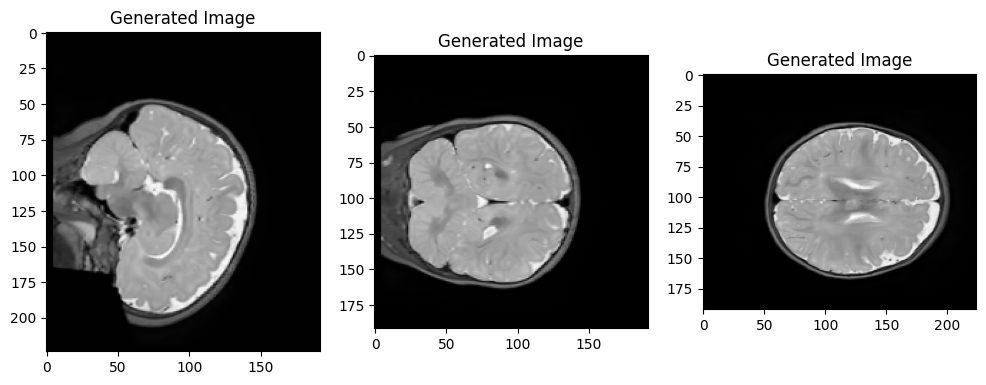

In [6]:
#plot middle slice of first generated image
import matplotlib.pyplot as plt
mid_slice = target_shape[0] // 2
plt.figure(figsize=(12, 8))
plt.subplot(1,3,1)
plt.title("Generated Image")
plt.imshow(generated_images[0][mid_slice,:,:], cmap='gray')
plt.subplot(1,3,2)
plt.title("Generated Image")
plt.imshow(generated_images[0][:,mid_slice,:], cmap='gray')
plt.subplot(1,3,3)
plt.title("Generated Image")
plt.imshow(generated_images[0][:,:,mid_slice], cmap='gray')
plt.show()

nib.save(nib.Nifti1Image(generated_images[0], affine=ref_img.affine), "/Users/al1612le/images/generated_image_12augnet_10res_D2axial_input_32batch.nii.gz")


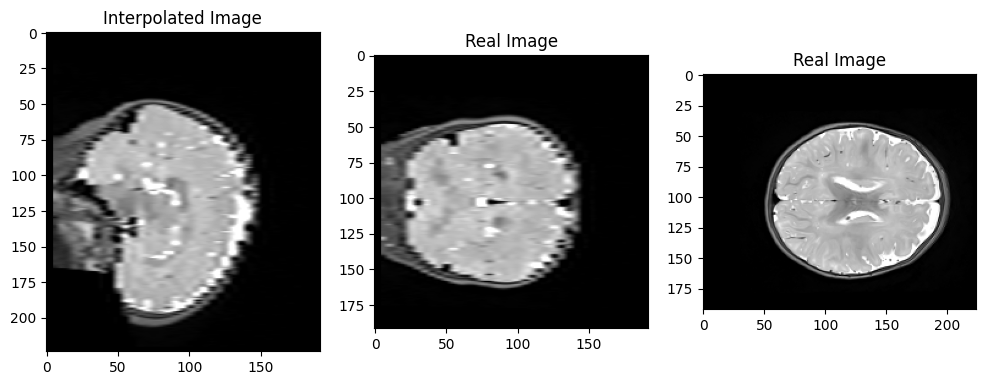

In [9]:
#plot middle slice of first generated image
import matplotlib.pyplot as plt
mid_slice = target_shape[0] // 2
plt.figure(figsize=(12, 8))
plt.subplot(1,3,1)
plt.title("Interpolated Image")
plt.imshow(interpolated_images[0][mid_slice,:,:], cmap='gray')
plt.subplot(1,3,2)
plt.title("Real Image")
plt.imshow(interpolated_images[0][:,mid_slice,:], cmap='gray')
plt.subplot(1,3,3)
plt.title("Real Image")
plt.imshow(interpolated_images[0][:,:,mid_slice], cmap='gray')
plt.show()

nib.save(nib.Nifti1Image(interpolated_images[0], affine=ref_img.affine), "/Users/al1612le/images/interpolated_D5.nii.gz")


In [79]:
#calculate metrics
metrics = calculate_metrics(real_images, generated_images)
print(f"Generated - PSNR: {metrics['psnr']}, SSIM: {metrics['ssim']}, NRMSE: {metrics['nrmse']}, MSE: {metrics['mse']}")


Generated - PSNR: 38.274790713856234, SSIM: 0.9925699835800548, NRMSE: 0.0488363553863997, MSE: 0.00015274392786335792


In [13]:
metrics_ci = calculate_CI(real_images, generated_images)
print(f"Generated - PSNR: {metrics_ci['psnr']}, PSNR CI half-width: {metrics_ci['psnr_ci']}")

NameError: name 'calculate_CI' is not defined

In [7]:
#implement lpips

from monai.losses.perceptual import PerceptualLoss, MedicalNetPerceptualSimilarity

lpips_loss = MedicalNetPerceptualSimilarity()

import torch

# Convert numpy arrays to torch tensors and add batch and channel dimensions
real_tensor = torch.tensor(real_images[0]).unsqueeze(0).unsqueeze(0).float()
gen_tensor = torch.tensor(generated_images[0]).unsqueeze(0).unsqueeze(0).float()
#interp_tensor = torch.tensor(interpolated_images[0]).unsqueeze(0).unsqueeze(0).float()


gen_lpips = lpips_loss(real_tensor, gen_tensor)
#interp_lpips = lpips_loss(real_tensor, interp_tensor)

print(f"LPIPS - Generated: {gen_lpips.item()}")

/Users/al1612le/.cache/torch/hub/warvito_MedicalNet-models_main/medicalnet_models/models/resnet.py:247: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_state_dict =

LPIPS - Generated: 6.145144197944319e-06


In [18]:
lpips_loss = PerceptualLoss(
    spatial_dims=3,
    network_type="medicalnet_resnet10_23datasets",
    is_fake_3d=False,   
)

/Users/al1612le/.cache/torch/hub/warvito_MedicalNet-models_main/medicalnet_models/models/resnet.py:247: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_state_dict =

In [34]:
generated_lpips = generated_images

In [29]:
#calculate metrics
metrics = calculate_metrics(real_images, generated_lpips)
print(f"Generated - PSNR: {metrics['psnr']}, SSIM: {metrics['ssim']}, NRMSE: {metrics['nrmse']}, MSE: {metrics['mse']}")

#implement lpips

from monai.losses.perceptual import PerceptualLoss, MedicalNetPerceptualSimilarity

lpips_loss = MedicalNetPerceptualSimilarity()

import torch

# Convert numpy arrays to torch tensors and add batch and channel dimensions
real_tensor = torch.tensor(real_images[0]).unsqueeze(0).unsqueeze(0).float()
gen_tensor = torch.tensor(generated_lpips[0]).unsqueeze(0).unsqueeze(0).float()
#interp_tensor = torch.tensor(interpolated_images[0]).unsqueeze(0).unsqueeze(0).float()


gen_lpips = lpips_loss(real_tensor, gen_tensor)
#interp_lpips = lpips_loss(real_tensor, interp_tensor)

print(f"LPIPS - Generated: {gen_lpips.item()}")


Generated - PSNR: 36.398086005696435, SSIM: 0.9892498811688424, NRMSE: 0.057372037577716146, MSE: 0.00023460595553660425


/Users/al1612le/.cache/torch/hub/warvito_MedicalNet-models_main/medicalnet_models/models/resnet.py:247: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_state_dict =

LPIPS - Generated: 2.592437795101432e-06


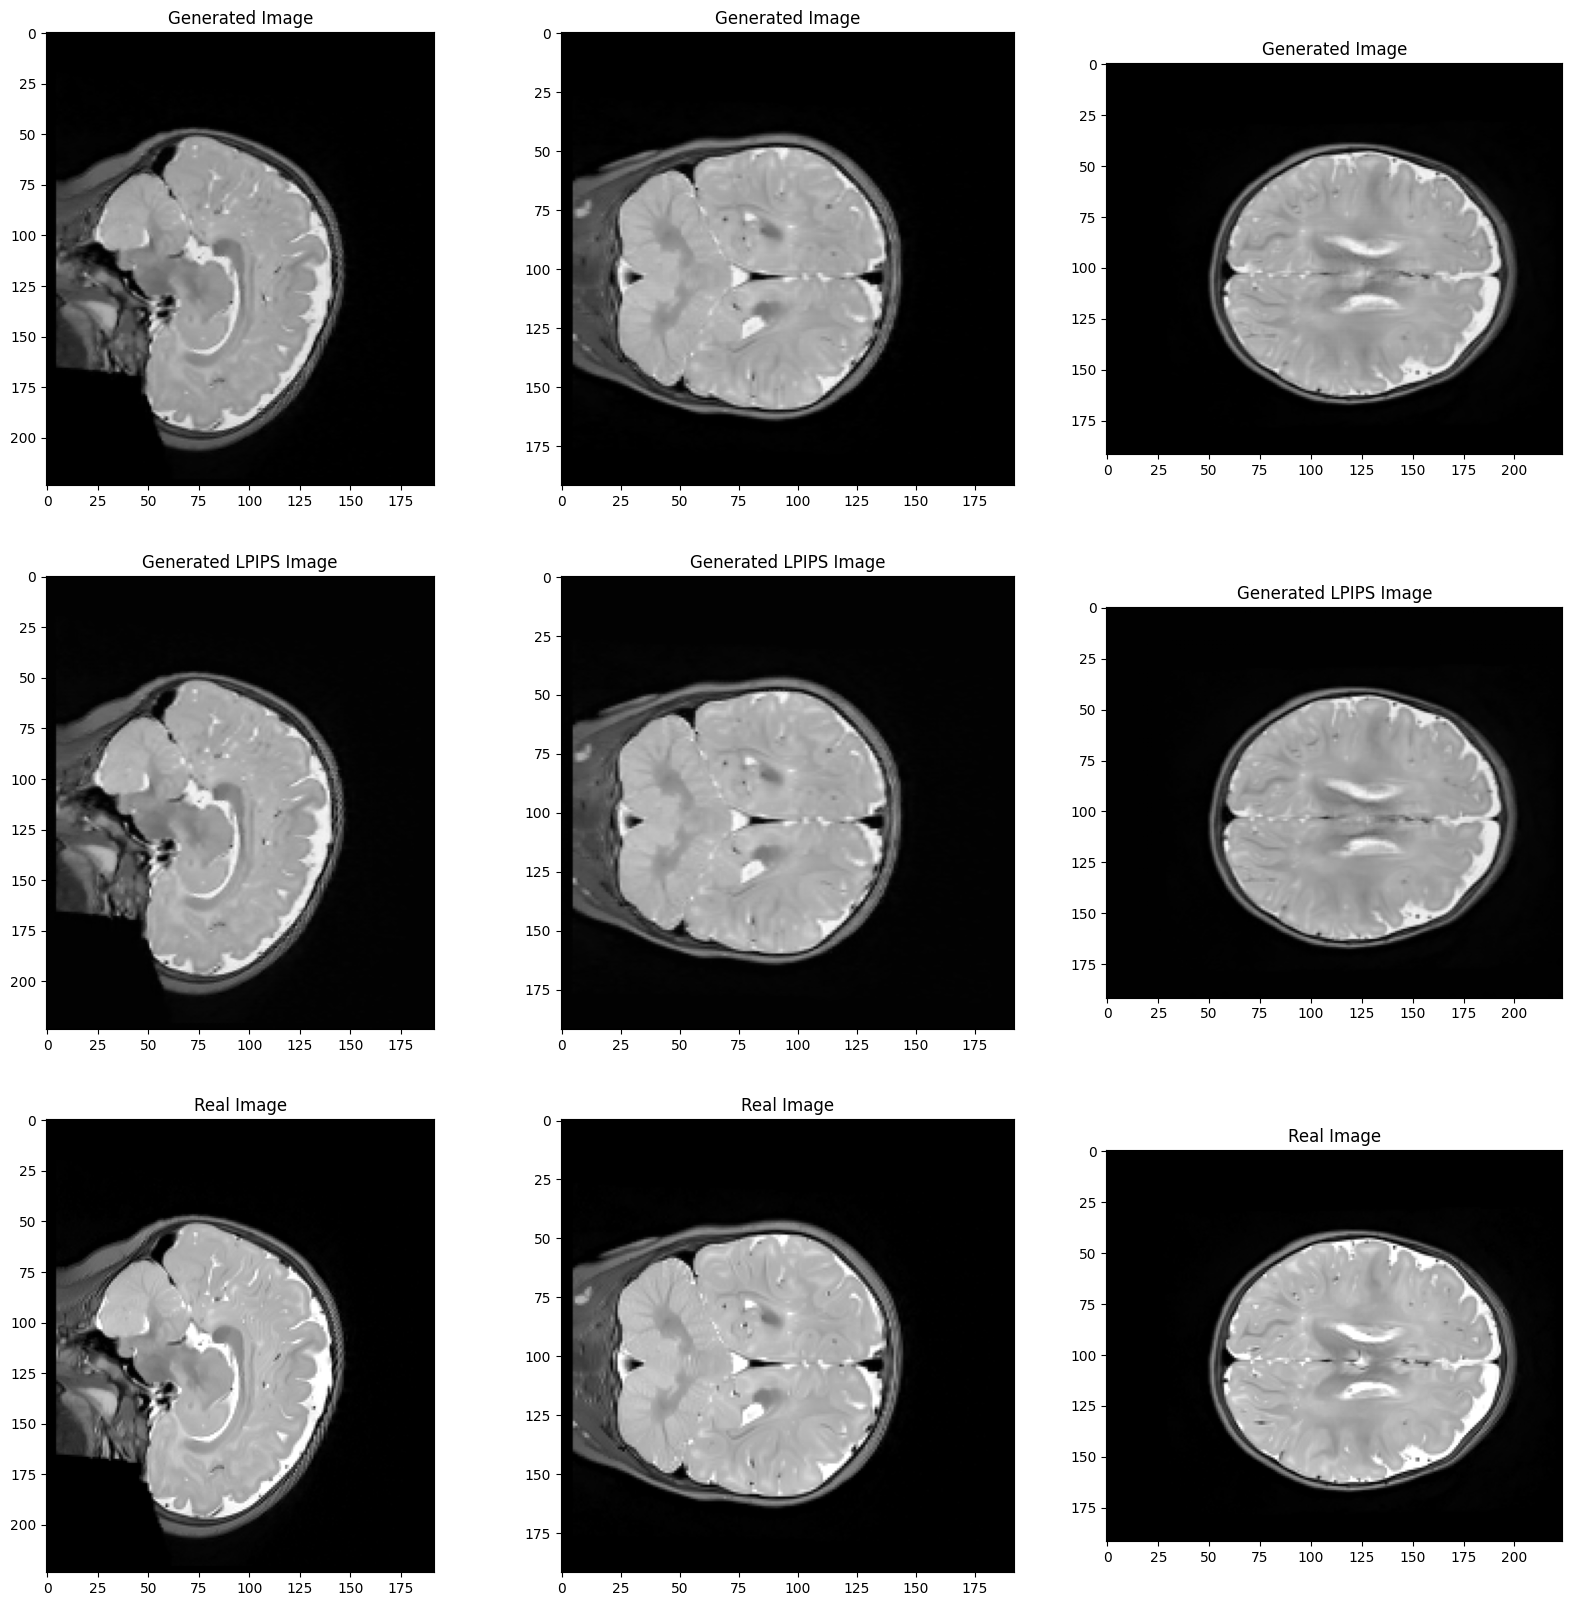

In [36]:
#plot generated and real image middle slices
import matplotlib.pyplot as plt
import numpy as np
mid_slice = target_shape[0] // 2

plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
plt.title("Generated Image")
plt.imshow(generated_images[0][mid_slice,:,:], cmap='gray')
plt.subplot(3,3,2)
plt.title("Generated Image")
plt.imshow(generated_images[0][:,mid_slice,:], cmap='gray')
plt.subplot(3,3,3)
plt.title("Generated Image")
plt.imshow(generated_images[0][:,:,mid_slice], cmap='gray')
plt.subplot(3,3,4)
plt.title("Generated LPIPS Image")
plt.imshow(generated_lpips[0][mid_slice,:,:], cmap='gray')
plt.subplot(3,3,5)
plt.title("Generated LPIPS Image")
plt.imshow(generated_lpips[0][:,mid_slice,:], cmap='gray')
plt.subplot(3,3,6)
plt.title("Generated LPIPS Image")
plt.imshow(generated_lpips[0][:,:,mid_slice], cmap='gray')
plt.subplot(3,3,7)
plt.title("Real Image")
plt.imshow(real_images[0][mid_slice,:,:], cmap='gray')
plt.subplot(3,3,8)
plt.title("Real Image")
plt.imshow(real_images[0][:,mid_slice,:], cmap='gray')
plt.subplot(3,3,9)
plt.title("Real Image")
plt.imshow(real_images[0][:,:,mid_slice], cmap='gray')
plt.show()

In [37]:
#save images
#nib.save(nib.Nifti1Image(generated_images[0], affine=ref_img.affine), "/Users/al1612le/images/generated_image.nii.gz")
nib.save(nib.Nifti1Image(generated_lpips[0], affine=ref_img.affine), "/Users/al1612le/images/generated_lpips01_image.nii.gz")
#nib.save(nib.Nifti1Image(real_images[0], affine=ref_img.affine), "/Users/al1612le/images/real_image.nii.gz")

In [ ]:

import pathlib
import nibabel as nib
import torch
import torch.nn as nn
from monai.networks.nets import UNet, patchgan_discriminator
from torch.utils.data import DataLoader
import torch.optim as optim
from generative.networks.nets import PatchDiscriminator
from generative.losses import PatchAdversarialLoss
from archived.datasetold import TrainDataset
from preprocessing import split_dataset, get_patches

# Parameters
batch_size = 2
patch_size = (32, 32, 32)
stride = (16, 16, 16)
target_shape = (192, 224, 192) 
num_epochs = 20
lambda_adv = 0.01 # Weight for adversarial loss, from papers?

# Define Generator and Discriminator
G = UNet(
    spatial_dims=3,
    in_channels=2,
    out_channels=1,
    channels=(16, 32, 64, 128, 256),
    strides=(2, 2, 2, 2),
    num_res_units=2,
    norm=None,
)

D = PatchDiscriminator(
    spatial_dims=3,
    num_channels=32,
    in_channels=3,
    out_channels=1,
)


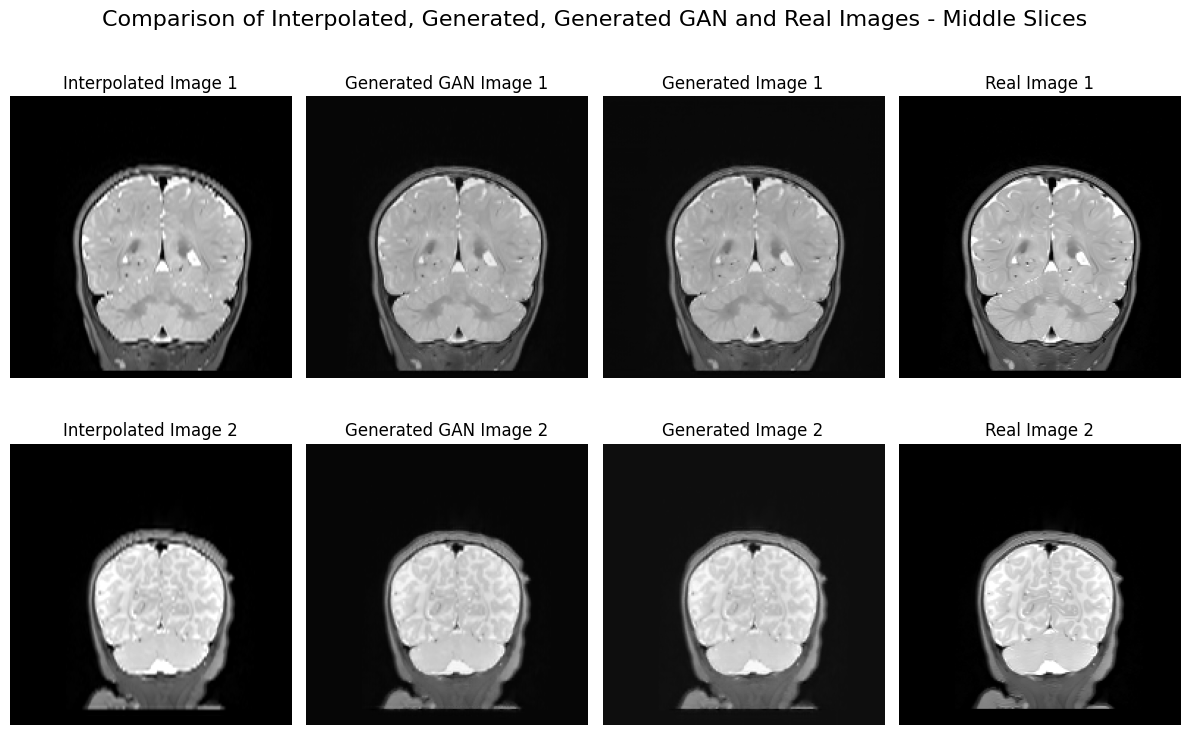

In [14]:
#visualize adadm results
#plot middle slice of interpolated_images, generated_images, generated_adadm and real_images in a grid for comparison, first 2 images. image typs as columns, image index as rows
import matplotlib.pyplot as plt
import numpy as np

#turn image 90 degrees anti clockwise for correct orientation
interpolated_images = [np.rot90(img, k=1, axes=(0, 2)) for img in interpolated_images]
generated_GAN = [np.rot90(img, k=1, axes=(0, 2)) for img in generated_GAN]
generated_images = [np.rot90(img, k=1, axes=(0, 2)) for img in generated_images]
real_images = [np.rot90(img, k=1, axes=(0, 2)) for img in real_images]

num_images = 2
cols = 4
rows = num_images
plt.figure(figsize=(12, 8))
for i in range(num_images):
    plt.subplot(rows, cols, i * cols + 1)
    mid_slice = interpolated_images[i].shape[2] // 2
    #flip the slice for correct orientation
    plt.imshow(interpolated_images[i][:, mid_slice, :], cmap='gray')
    plt.axis('off')
    plt.title(f"Interpolated Image {i+1}")
    
    plt.subplot(rows, cols, i * cols + 2)
    mid_slice = generated_GAN[i].shape[2] // 2
    plt.imshow(generated_GAN[i][:, mid_slice, :], cmap='gray')
    plt.axis('off')
    plt.title(f"Generated GAN Image {i+1}")

    plt.subplot(rows, cols, i * cols + 3)
    mid_slice = generated_images[i].shape[2] // 2
    plt.imshow(generated_images[i][:, mid_slice, :], cmap='gray')
    plt.axis('off')
    plt.title(f"Generated Image {i+1}")

    plt.subplot(rows, cols, i * cols + 4)
    mid_slice = real_images[i].shape[2] // 2
    plt.imshow(real_images[i][:, mid_slice, :], cmap='gray')
    plt.axis('off')
    plt.title(f"Real Image {i+1}")
plt.suptitle('Comparison of Interpolated, Generated, Generated GAN and Real Images - Middle Slices', fontsize=16)
plt.tight_layout()
plt.show()


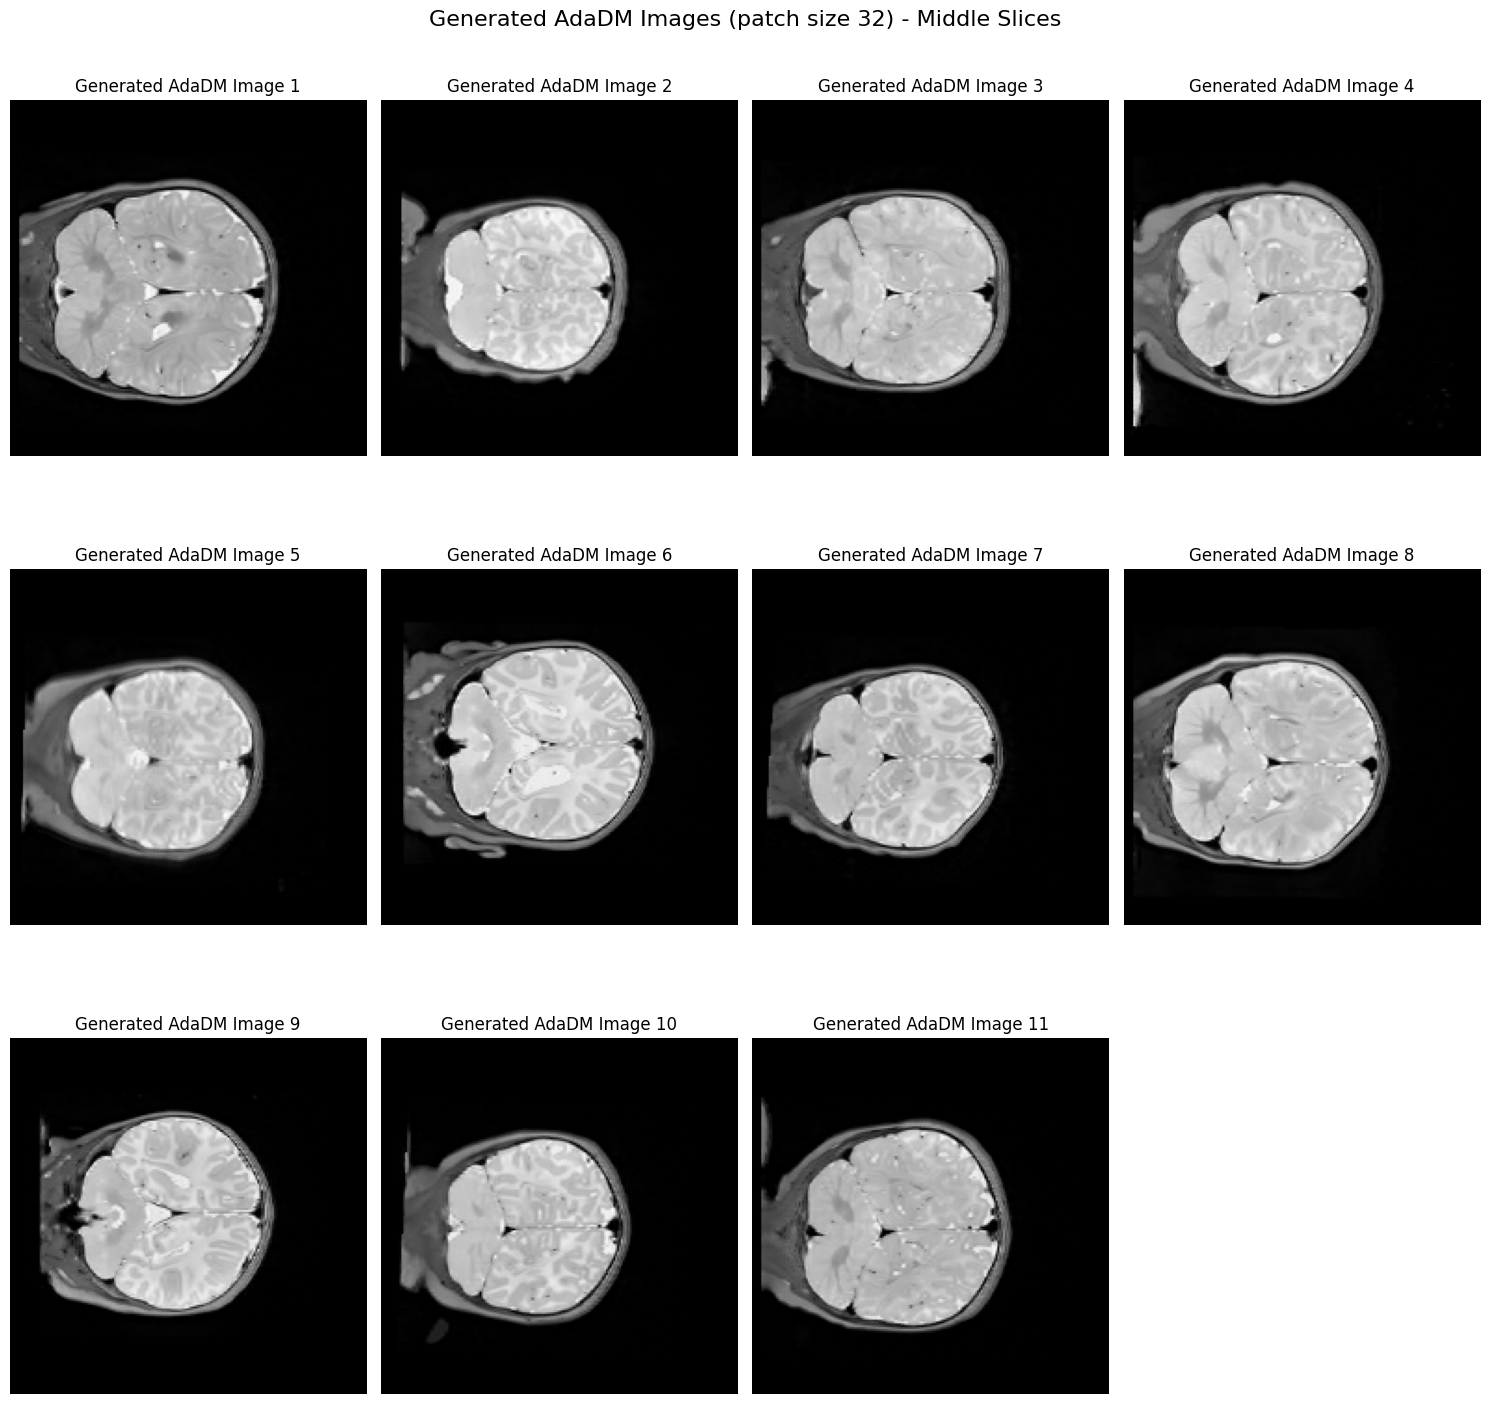

In [ ]:
# plot all test adadm


#plot the middle slice of all images in a grid
import matplotlib.pyplot as plt
import numpy as np
num_images = len(generated_adadm)
cols = 4
rows = num_images // cols + int(num_images % cols > 0)
plt.figure(figsize=(15, 15))
for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    mid_slice = generated_adadm[i].shape[2] // 2
    plt.imshow(generated_adadm[i][:, mid_slice, :], cmap='gray')
    plt.axis('off')
    plt.title(f"Generated AdaDM Image {i+1}")
plt.suptitle('Generated AdaDM Images (patch size 32) - Middle Slices', fontsize=16)
plt.tight_layout()
plt.show()



In [ ]:
#make adadm generated to nifti files
output_dir = DATA_DIR/"generated_images"/"adadm_generated_nifti"
output_dir.mkdir(parents=True, exist_ok=True)
for i, img in enumerate(generated_adadm):
    nifti_img = nib.Nifti1Image(img, affine=ref_img.affine)
    nib.save(nifti_img, output_dir/f"adadm_generated_image_{i+1}.nii.gz")




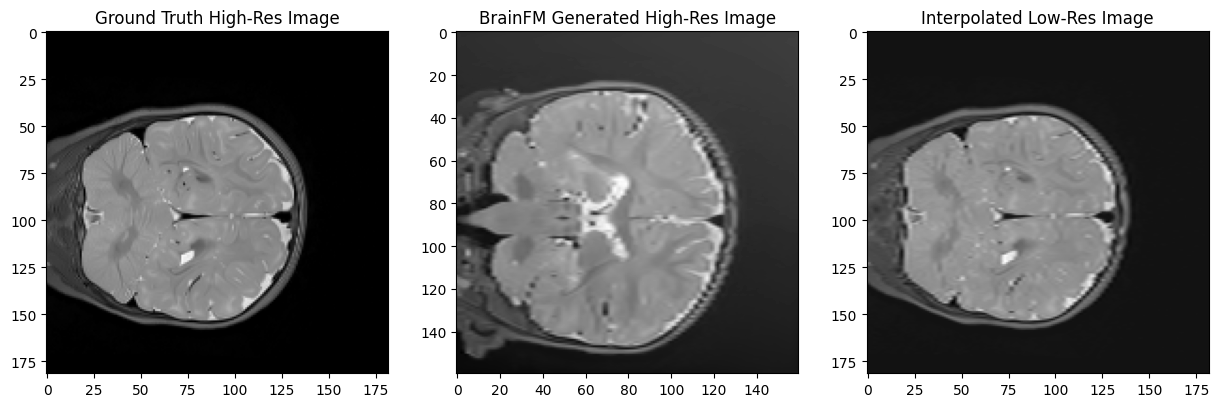

In [17]:
#try the brainFM model
import pathlib as p
import nibabel as nib
import matplotlib.pyplot as plt

data_dir = p.Path.home()/"BrainFM_outputs/test/test_sr_1-1-1/sub-890518_ses-8mo_space-INFANTMNIacpc_T2w_LR.nii.gz"
out_high_res = nib.load(str(data_dir/"input_T1"/"out_high_res.nii.gz"))
gt = nib.load(test[0][1])  # Load the ground truth high-resolution image from the test set
interp = nib.load(test[0][2])  # Load the low-resolution input image from the test set
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title("Ground Truth High-Res Image")
plt.imshow(gt.get_fdata()[:,gt.shape[2]//2,:], cmap='gray')
plt.subplot(1,3,2)
plt.title("BrainFM Generated High-Res Image")
plt.imshow(out_high_res.get_fdata()[:,out_high_res.shape[2]//2,:], cmap='gray')
plt.subplot(1,3,3)
plt.title("Interpolated Low-Res Image")
plt.imshow(interp.get_fdata()[:,interp.shape[2]//2,:], cmap='gray')


In [72]:
img = nib.load(t2_files[0]).get_fdata()
scale_factor = 2
start_slice = 1  # or 1 for odd slices
down_img = img[:, :, start_slice::scale_factor]
    
# Calculate zoom factors to match original shape
zoom_factors = np.array(img.shape) / np.array(down_img.shape)
up_img = zoom(down_img, zoom_factors, order=3, mode='grid-constant', grid_mode=True)  # order=3: cubic interpolation

# Pad to compensate for start_slice offset
#end_pad = (img.shape[2] - up_img.shape[2] - start_slice)
#pad_width = [(0, 0), (0, 0), (start_slice, end_pad)]
#up_img = np.pad(up_img, pad_width, mode='constant', constant_values=0)
#print(up_img.shape)

In [73]:
img = nib.load(t2_LR_files[0]).get_fdata()
print(img.shape)
#shift one voxel down in z direction
img = np.roll(img, shift=-1, axis=2)
print(img.shape)
nib.save(nib.Nifti1Image(up_img, affine=ref_img.affine), "/Users/al1612le/images/gridconstant_image.nii.gz")

(182, 218, 182)
(182, 218, 182)


In [ ]:
for i in range(3):
    t1 = t1_files[i]
    t2 = t2_files[i]
    t2_LR = t2_LR_files[i]
    t1 = scale_to_reference_img(nib.load(str(t1)), ref_img)
    t2 = scale_to_reference_img(nib.load(str(t2)), ref_img)
    t2_LR = scale_to_reference_img(nib.load(str(t2_LR)), ref_img)
    nib.save(t1, DATA_DIR/"scaletoref"/f"scaled_t1_image_{i+1}.nii.gz")
    nib.save(t2, DATA_DIR/"scaletoref"/f"scaled_t2_image_{i+1}.nii.gz")
    nib.save(t2_LR, DATA_DIR/"scaletoref"/f"scaled_t2_LR_image_{i+1}.nii.gz")


<OrthoSlicer3D: (182, 218, 182)>

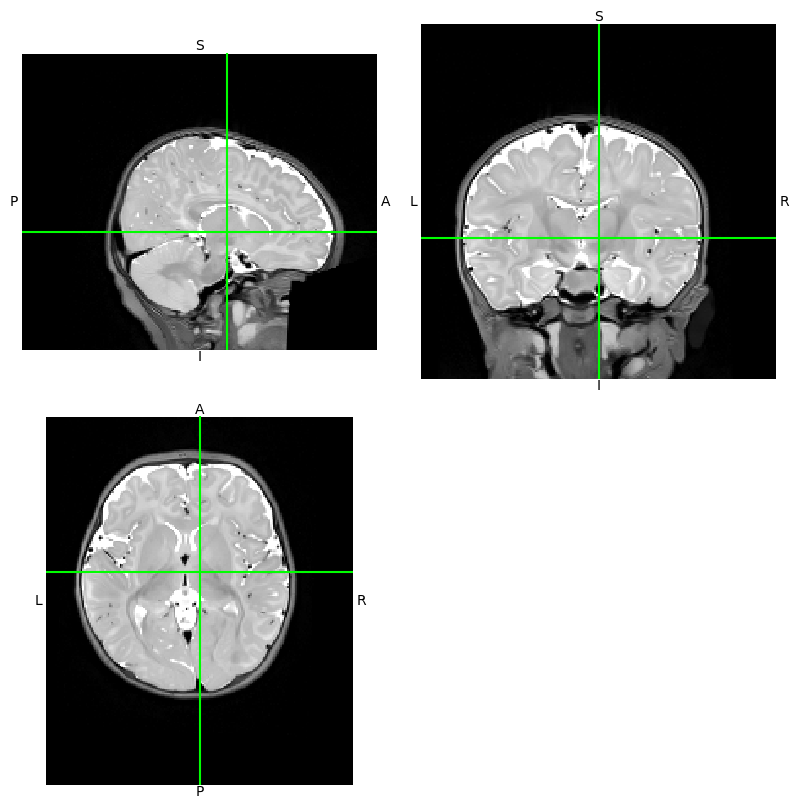

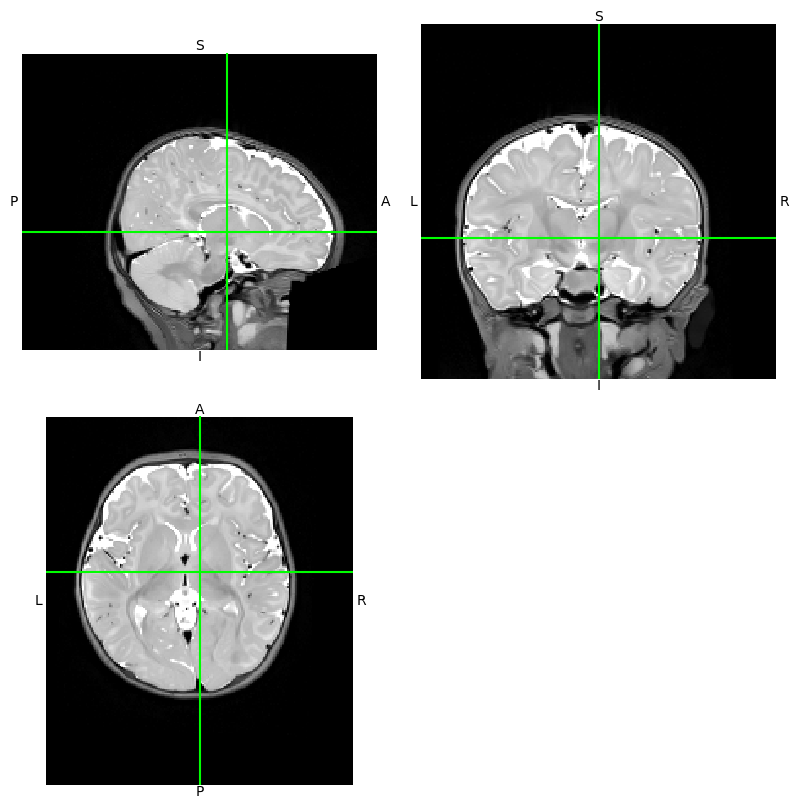

In [216]:

nib.load(t2_files[2]).orthoview()
t2s = scale_to_reference_img(nib.load(t2_files[2]), ref_img)
t2s.orthoview()

In [167]:
#!kill 97604
%load_ext tensorboard

%tensorboard --logdir unet_visualization


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 98454), started 0:00:09 ago. (Use '!kill 98454' to kill it.)

In [168]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter(log_dir="unet_visualization")
dummy_input1 = torch.randn(1, 1, 32, 32, 32)
dummy_input2 = torch.randn(1, 1, 32, 32, 32)
dummy_input = torch.cat((dummy_input1, dummy_input2), dim=1)  # (1, 2, 32, 32, 32)
writer.add_graph(net, dummy_input)
writer.close()




In [4]:
#Collect evaluation metrics: START LOOKING HERE

import pathlib as p
from functions import *
from evaluations import calculate_metrics
import nibabel as nib
import numpy as np
import random

# interpolated
DATA_DIR = p.Path.home()/"data"/"bobsrepository"
axial = DATA_DIR/"LR_data"/"axial"/"even"
coronal = DATA_DIR/"LR_data"/"coronal"/"even"
sagittal = DATA_DIR/"LR_data"/"sagittal"/"even"
t1_files = sorted(DATA_DIR.rglob("*T1w.nii.gz"))
t2_files = sorted(DATA_DIR.rglob("*T2w.nii.gz"))
t2_LR_files = sorted(axial.rglob("*T2w_LR.nii.gz"))
t2_LR4_files = sorted(axial.rglob("*T2w_LR4.nii.gz"))
ref_img = nib.load(t1_files[0])  # Use the first T1 image as reference
target_shape = (192, 224, 192) 
patch_size = (64,64,64)
stride = (32,32,32)

files = list(zip(t1_files, t2_files, t2_LR_files))
files4 = list(zip(t1_files, t2_files, t2_LR4_files))
train, val, test = split_dataset(files)
train4, val4, test4 = split_dataset(files4)
print(f"Train: {len(train)}, Val: {len(val)}, Test: {len(test)}")

test_t1, test_t2, test_t2_LR = get_patches(test, patch_size, stride, target_shape)



Train: 49, Val: 11, Test: 11


In [5]:
#INTERPOLATION AND REAL RECONSTRUCTION
interpolated_images = []
real_images = []
t1_images = []
for i in range(len(test_t1)):
    interpolated_reconstructed = reconstruct_from_patches(test_t2_LR[i], target_shape, stride)
    interpolated_images.append(interpolated_reconstructed)
    real_reconstructed = reconstruct_from_patches(test_t2[i], target_shape, stride)
    real_images.append(real_reconstructed)
    t1_rec = reconstruct_from_patches(test_t1[i], target_shape, stride)
    t1_images.append(t1_rec)

    print(f"Processed test image {i+1}/{len(test_t1)}")


Processed test image 1/11
Processed test image 2/11
Processed test image 3/11
Processed test image 4/11
Processed test image 5/11
Processed test image 6/11
Processed test image 7/11
Processed test image 8/11
Processed test image 9/11
Processed test image 10/11
Processed test image 11/11


In [6]:
#IMAGE RECONSTRUCTION FOR METRICS

# Normal Unet, no Norm: 2025-10-16T23:05:46.875504_model_weights.pth 32 patches
# lr4 augmentation deep net 6 layers, 4 residuals 2025-11-21T10:11:50.269208_model_weights.pth
# deeper unet 2025-11-22T10:33:08.885884_model_weights.pth (32, 64, 128, 256, 512, 1024), residual = 6
# deep unet best result so far 2025-11-25T08:50:02.625510_model_weights.pth (32, 64, 128, 256, 512, 1024), residual = 10
# lr4 augmentation deep net 2025-11-24T14:31:13.693316_model_weights.pth (32, 64, 128, 256, 512, 1024), residual = 10 no lpips
# deep unet with single input T2 2025-11-26T17:25:11.234141_model_weights.pth (32, 64, 128, 256, 512, 1024), residual = 10
# deep unet with single input T1 2025-11-25T08:47:31.550643_model_weights.pth (32, 64, 128, 256, 512, 1024), residual = 10
# old net 2025-11-21T10:22:23.698955_model_weights.pth (16, 32, 64, 128, 256), residual = 6
# LR3 augmentation even added 2025-12-10T15:25:46.850860_model_weights.pth (32, 64, 128, 256, 512, 1024), residual = 10
# super augmentation pre weights: 2025-12-12T14:44:03.351051_model_weights.pth (32, 64, 128, 256, 512, 1024), residual = 10, lr 2,3,4,5,8 3dimesnions for all. even interpolation
# deep unet lr2 64patches 2025-12-16T14:01:11.253492_model_weights.pth (32, 64, 128, 256, 512, 1024), residual = 10
# Normal deep unet but with larger patches (64), 2025-12-16T14:01:11.253492_model_weights.pth (32, 64, 128, 256, 512, 1024), residual = 10
# breakpoint (no resampling part) deep unet 2025-12-01T09:47:31.531308_model_weights.pth (32, 64, 128, 256, 512, 1024), residual = 10
# deep unet with 2 residual units 2026-01-02T20:20:22.571459_model_weights.pth
# deep unet with 18 residual units 2025-12-16T16:30:48.046569_model_weights.pth
# deep unet with 0 residual units 2025-12-17T11:15:16.397184_model_weights.pth
# lr2+lr4 2026-01-04T10:03:01.741120_model_weights.pth
# t2w input 2026-01-05T11:06:43.838147_model_weights.pth
# t1w input 2026-01-05T12:05:11.005983_model_weights.pth
#shallow 2026-01-09T07:18:21.517417_model_weights.pth

import torch
from monai.networks.nets import UNet
from monai.networks.layers.factories import Norm
DATA_DIR = p.Path.home()/"data"/"bobsrepository"

net = UNet(
    spatial_dims=3,
    in_channels=2,
    out_channels=1,
    channels=(32, 64, 128, 256, 512, 1024),
    strides=(2, 2, 2, 2, 2),
    num_res_units=10,
    norm=None,
)
net.load_state_dict(torch.load(DATA_DIR/"outputs"/"2025-12-01T09:47:31.531308_model_weights.pth", map_location="cpu"))

generated_images = []
net.eval()
with torch.no_grad():
    for i in range(len(test_t1)):
        all_outputs = []
        for j in range(len(test_t1[0])):
            input1 = torch.tensor(test_t1[i][j]).float()
            input2 = torch.tensor(test_t2_LR[i][j]).float()
            inputs = torch.stack([input1, input2], dim=0).unsqueeze(0)  
            output = net(inputs)
            all_outputs.append(output.squeeze(0).squeeze(0).cpu().numpy())  
        gen_reconstructed = reconstruct_from_patches(all_outputs, target_shape, stride)
        generated_images.append(gen_reconstructed)
        print(f"Processed test image {i+1}/{len(test_t1)}")
        

/var/folders/j3/fb9w9g7s1vqdx2y5by7m63180000gp/T/ipykernel_52647/2383042593.py:38: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  net.load_state_dict(torch.load(DATA_DIR/"out

Processed test image 1/11
Processed test image 2/11
Processed test image 3/11
Processed test image 4/11
Processed test image 5/11
Processed test image 6/11
Processed test image 7/11
Processed test image 8/11
Processed test image 9/11
Processed test image 10/11
Processed test image 11/11


In [7]:
ci_metrics = calculate_CI(real_images, generated_images)
print(f"Generated - PSNR: {ci_metrics['psnr']}, PSNR std: {ci_metrics['psnr_std']}, PSNR list:{ci_metrics['psnr_list']}")

Generated - PSNR: 38.23837629840916, PSNR std: 1.0219749770801387, PSNR list:[np.float64(37.12469676792354), np.float64(38.954597532898354), np.float64(37.925637467451665), np.float64(36.810535156413955), np.float64(40.64678597352205), np.float64(38.052161844540656), np.float64(38.599022890110334), np.float64(37.963051830692905), np.float64(38.2616214856681), np.float64(39.0191904211044), np.float64(37.26483791217478)]


In [ ]:
#Check all images look correctly reconstructed
import matplotlib.pyplot as plt
for i in range(len(generated_images)):
    plt.imshow(generated_images[i][:,generated_images[i].shape[1]//2,:], cmap='gray')


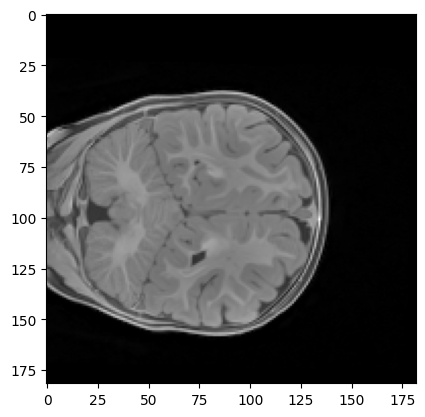

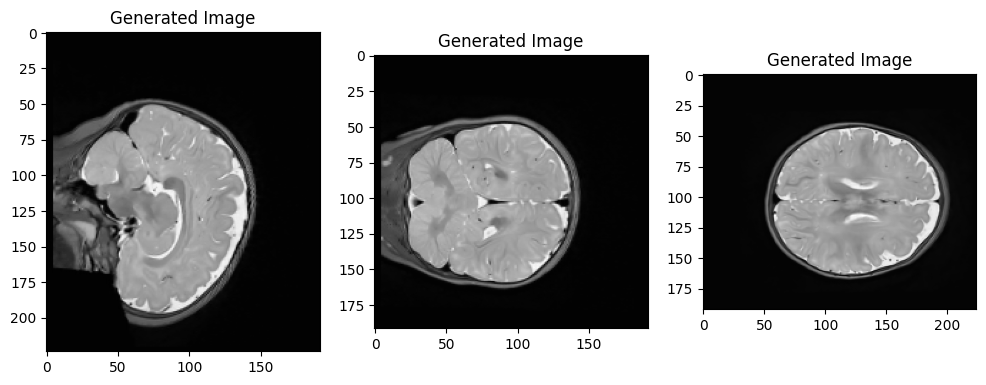

In [8]:
plt.imshow(nib.load(t1_files[60]).get_fdata()[:,nib.load(t1_files[60]).shape[2]//2,:], cmap='gray')

#plot middle slice of first generated image
import matplotlib.pyplot as plt
mid_slice = target_shape[0] // 2
plt.figure(figsize=(12, 8))
plt.subplot(1,3,1)
plt.title("Generated Image")
plt.imshow(generated_images[0][mid_slice,:,:], cmap='gray')
plt.subplot(1,3,2)
plt.title("Generated Image")
plt.imshow(generated_images[0][:,mid_slice,:], cmap='gray')
plt.subplot(1,3,3)
plt.title("Generated Image")
plt.imshow(generated_images[0][:,:,mid_slice], cmap='gray')
plt.show()

nib.save(nib.Nifti1Image(generated_images[-1], affine=ref_img.affine), "/Users/al1612le/images/last_deep.nii.gz")

In [10]:
#calclulate metrics
metrics = calculate_metrics(real_images, generated_images)

from monai.losses.perceptual import MedicalNetPerceptualSimilarity
lpips_loss = MedicalNetPerceptualSimilarity()
import torch

gen_lpips = 0
for i in range(len(real_images)):
    # Convert numpy arrays to torch tensors and add batch and channel dimensions
    real_tensor = torch.tensor(real_images[i]).unsqueeze(0).unsqueeze(0).float()
    gen_tensor = torch.tensor(generated_images[i]).unsqueeze(0).unsqueeze(0).float()
    gen_lpips += lpips_loss(real_tensor, gen_tensor)
mean_lpips = gen_lpips / len(real_images)
print(f"Generated - PSNR: {metrics['psnr']}, SSIM: {metrics['ssim']}, LPIPS: {mean_lpips.item()}")


/Users/al1612le/.cache/torch/hub/warvito_MedicalNet-models_main/medicalnet_models/models/resnet.py:247: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  pretrained_state_dict =

Generated - PSNR: 29.372140275886853, SSIM: 0.9583341521063384, LPIPS: 3.9340400689980015e-05


In [17]:
print(net)

UNet(
  (model): Sequential(
    (0): ResidualUnit(
      (conv): Sequential(
        (unit0): Convolution(
          (conv): Conv3d(2, 32, kernel_size=(3, 3, 3), stride=(2, 2, 2), padding=(1, 1, 1))
          (adn): ADN(
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
        (unit1): Convolution(
          (conv): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (adn): ADN(
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
        (unit2): Convolution(
          (conv): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (adn): ADN(
            (D): Dropout(p=0.0, inplace=False)
            (A): PReLU(num_parameters=1)
          )
        )
        (unit3): Convolution(
          (conv): Conv3d(32, 32, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1))
          (adn): ADN(
            (